<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


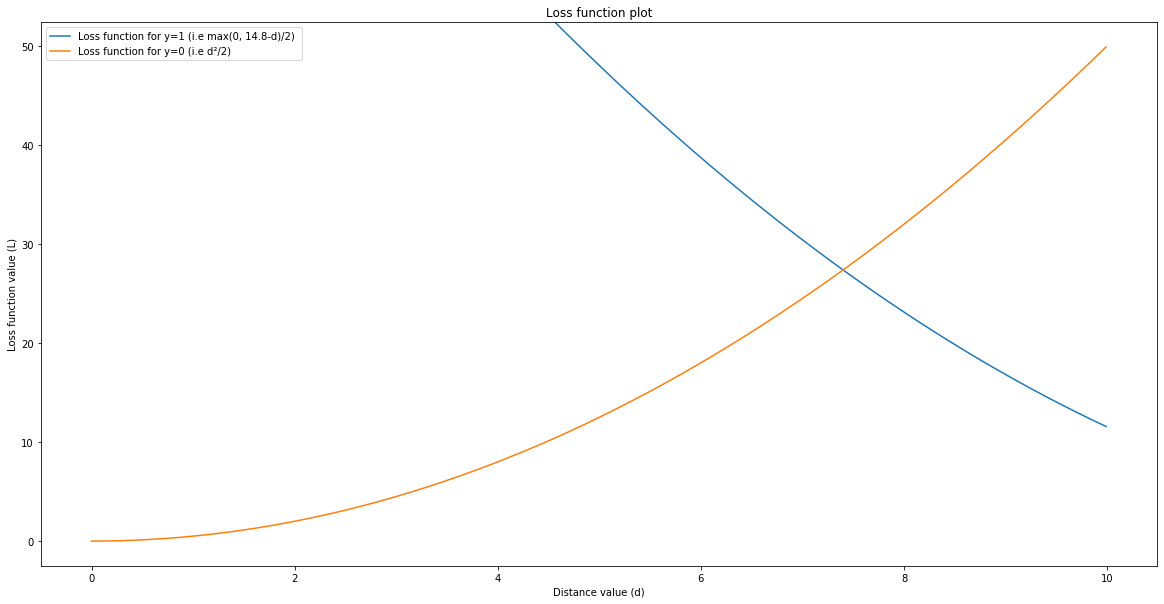

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(20, 10))

m = 2

x = np.arange(0, 10, 0.01)
line, = ax.plot(x, [(max(0, m - i)**2)/2 for i in x], label=f"Loss function for y=1 (i.e max(0, {m}-d))")
line2 = ax.plot(x, [(i)**2/2 for i in x], label=f"Loss function for y=0 (i.e d²/2)")
#ax.set_yticks(np.arange(0, 10, 1.0))
ax.set_title("Loss function plot")
ax.legend(loc='upper left', handles=[line], frameon=False)
ax.set_xlabel('Distance value (d)')
ax.set_ylabel('Loss function value (L)')

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(
        [(max(0, (m+i) - s)**2)/2 for s in x]
    )  # update the data.
    
    L=ax.legend()
    L.get_texts()[0].set_text(f"Loss function for y=1 (i.e max(0, {round(m+i,1)}-d)/2) ")
    
    return line,


ani = animation.FuncAnimation(
    fig, animate, frames = np.arange(0, 13, 0.2), init_func=init, interval=0.5, blit=True, save_count=60)

#To save the animation, use e.g.
#
ani.save("movie.gif")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()